# New section

#**Social media Menance Machine Learning project**

# ***Business Understanding***

Description of the Database
The dataset "Time Wasted on Social Media" provides an in-depth analysis of user interactions and engagement with various social media platforms. This dataset encompasses a wide range of attributes that allow for a detailed analysis of the impact of social media on users' time management and productivity. It serves as an essential resource for researchers, marketers, and sociologists who wish to explore the nuances of social media consumption habits.

In [45]:
# Let's import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [46]:
#Read the dataset
media = pd.read_csv('socialmedia.csv')
media

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


# Data Exploration

In [47]:
media.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [48]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [49]:
media.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [50]:
print(media.shape)

(1000, 31)


In [51]:
media.isnull().sum()

,0
UserID,0
Age,0
Gender,0
Location,0
Income,0
Debt,0
Owns Property,0
Profession,0
Demographics,0
Platform,0


In [52]:
media.isna().sum()

,0
UserID,0
Age,0
Gender,0
Location,0
Income,0
Debt,0
Owns Property,0
Profession,0
Demographics,0
Platform,0


In [53]:
media.duplicated().sum()

0

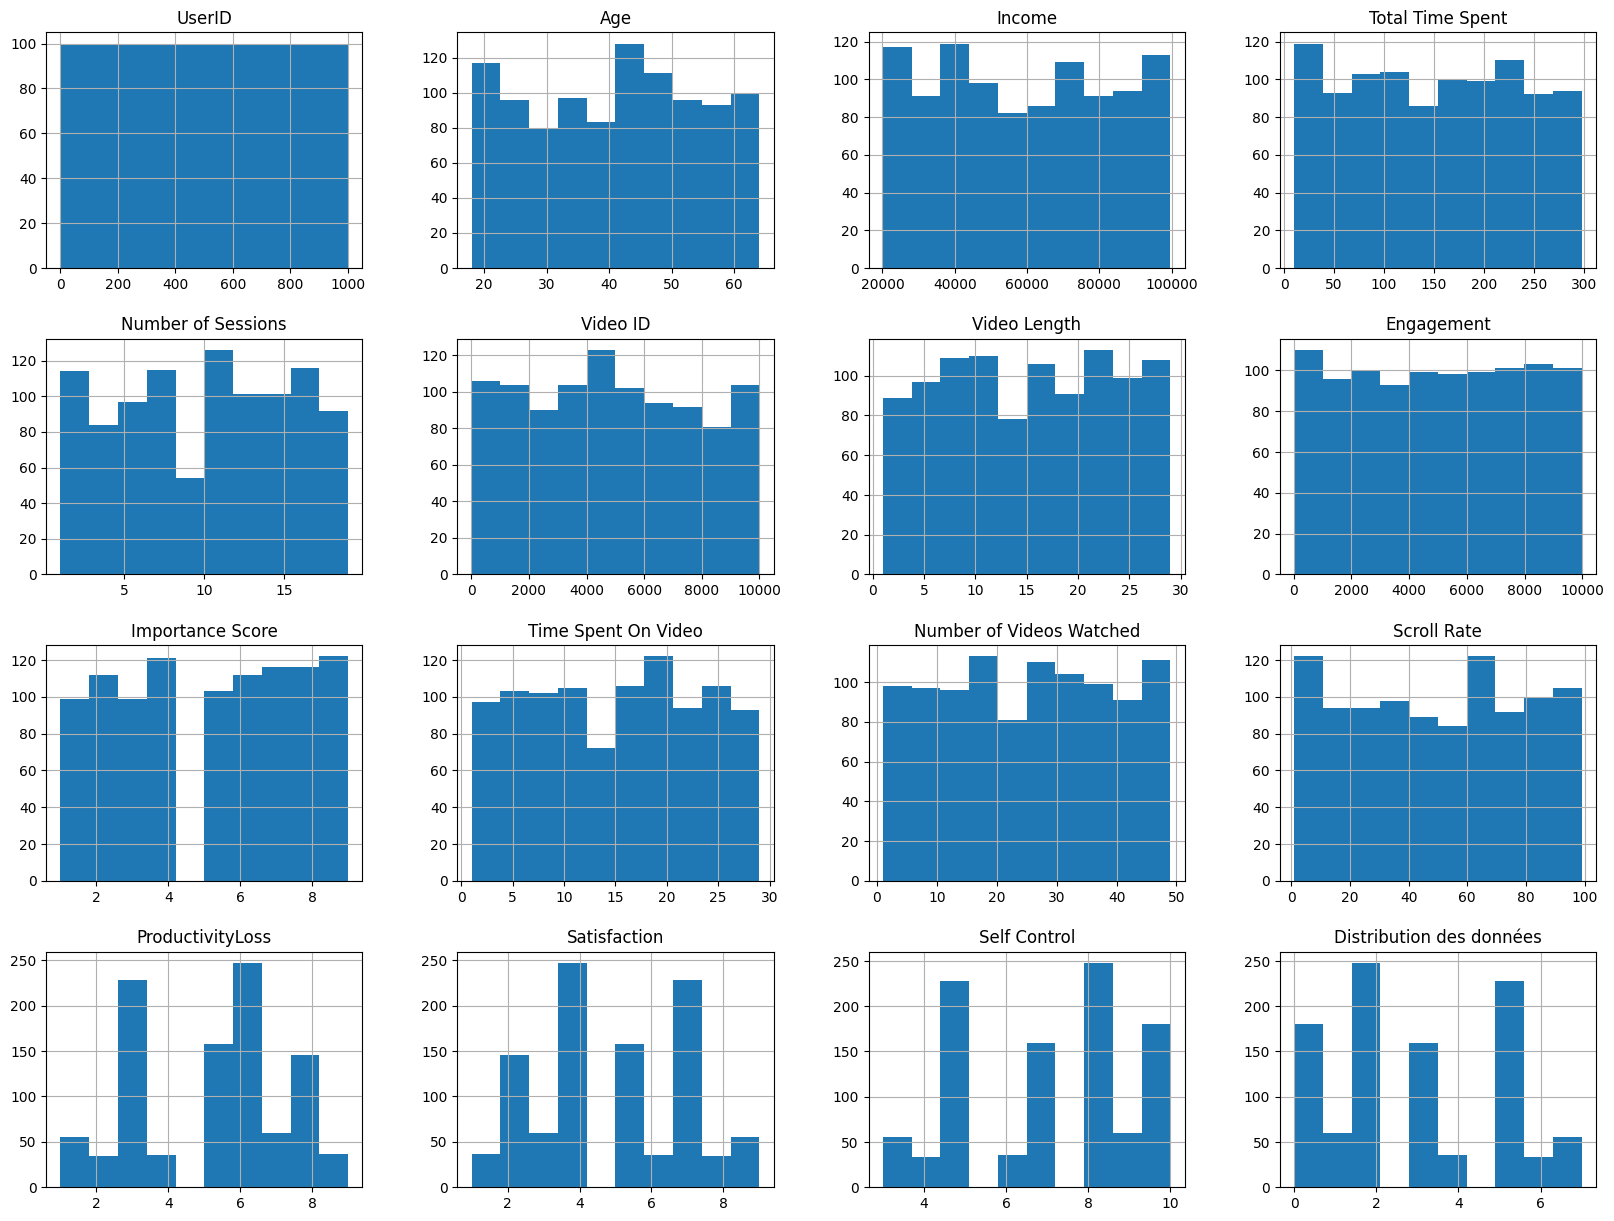

In [54]:
media.hist(figsize=(20,15))
plt.title("Distribution des données")
plt.show()

Data Columns

In [55]:
def show_column_names(data):
    return data.columns.tolist()
column_names = show_column_names(media)
print(column_names)

['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt', 'Owns Property', 'Profession', 'Demographics', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category', 'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS', 'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity', 'ConnectionType']


In [56]:
# Check the data types of each column in the DataFrame
print(media.dtypes)

UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64
Debt                          bool
Owns Property                 bool
Profession                  object
Demographics                object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video ID                     int64
Video Category              object
Video Length                 int64
Engagement                   int64
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   object
ProductivityLoss             int64
Satisfaction                 int64
Watch Reason                object
DeviceType                  object
OS                          object
Watch Time                  object
Self Control                 int64
Addiction Level     

## Data Preprocessing

In [57]:
# Display all unique values in the 'CurrentActivity' column
unique_activities = media['CurrentActivity'].unique()
print(unique_activities)

['Commuting' 'At school' 'At home' 'At work']


In [58]:
# Remove ' At ' from each value in the 'CurrentActivity' column
media['CurrentActivity'] = media['CurrentActivity'].str.replace('At ', '', regex=False)

# Display the updated unique values
print(media['CurrentActivity'].unique())

['Commuting' 'school' 'home' 'work']


In [59]:
unique_activitiesConnectionType = media['ConnectionType'].unique()
print(unique_activitiesConnectionType)

['Mobile Data' 'Wi-Fi']


In [60]:
media['ConnectionType'] = media['ConnectionType'].str.replace('Mobile Data', 'MobileData', regex=False)
print(media['ConnectionType'].unique())

['MobileData' 'Wi-Fi']


Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Gender', 'Location', 'Profession', 'Demographics', 'Platform',
                       'Frequency', 'Watch Reason', 'DeviceType', 'OS', 'CurrentActivity',
                       'ConnectionType']

for col in categorical_columns:
    media[col] = label_encoder.fit_transform(media[col])
media['Video Category'] = label_encoder.fit_transform(media['Video Category'])

Encoding Time Methode

In [62]:
def convert_to_minutes(time_str):
    # Convertir le temps en format 24 heures (ex. 21:00 pour 9:00 PM)
    time_obj = pd.to_datetime(time_str, format='%I:%M %p')
    # Extraire l'heure et les minutes
    hours = time_obj.hour
    minutes = time_obj.minute
    # Calculer les minutes depuis minuit
    total_minutes = hours * 60 + minutes
    return total_minutes

**Encoding Watch Time **

In [63]:
# Appliquer la conversion sur la colonne 'WatchTime'
media['Watch Time'] = media['Watch Time'].apply(convert_to_minutes)


# Vérifier le type de données et les premières lignes
media['Watch Time'] = media['Watch Time'].astype('int64')

**Coding Book**

In [64]:
# prompt: encode the bool types features (Debt    and Owns Property) to int

# Encode 'Debt' and 'Owns Property' columns to integers
media['Debt'] = media['Debt'].astype(int)
media['Owns Property'] = media['Owns Property'].astype(int)

In [65]:
print(media.dtypes)

UserID                      int64
Age                         int64
Gender                      int64
Location                    int64
Income                      int64
Debt                        int64
Owns Property               int64
Profession                  int64
Demographics                int64
Platform                    int64
Total Time Spent            int64
Number of Sessions          int64
Video ID                    int64
Video Category              int64
Video Length                int64
Engagement                  int64
Importance Score            int64
Time Spent On Video         int64
Number of Videos Watched    int64
Scroll Rate                 int64
Frequency                   int64
ProductivityLoss            int64
Satisfaction                int64
Watch Reason                int64
DeviceType                  int64
OS                          int64
Watch Time                  int64
Self Control                int64
Addiction Level             int64
CurrentActivit

In [66]:
# Compute the correlation matrix
correlation_matrix = media.corr()

# Display the correlation of all columns with the target variable (Video Category)
correlation_with_target = correlation_matrix['Frequency'].sort_values(ascending=False)

# Display the correlations
print(correlation_with_target)

Frequency                   1.000000
Addiction Level             0.403106
Satisfaction                0.387609
Watch Time                  0.376312
Age                         0.062539
ConnectionType              0.055709
Engagement                  0.042205
Scroll Rate                 0.035830
Number of Videos Watched    0.022339
Number of Sessions          0.022042
Importance Score            0.021388
Total Time Spent            0.015693
Debt                        0.015156
Demographics                0.012595
Video ID                    0.008224
Platform                    0.007825
Video Category              0.007601
Video Length                0.006815
DeviceType                  0.004545
Income                     -0.001017
Profession                 -0.003290
Watch Reason               -0.006533
Time Spent On Video        -0.010523
UserID                     -0.017491
Location                   -0.018957
Owns Property              -0.023323
CurrentActivity            -0.025722
O

In [67]:
correlation_matrix = media.corr()
print(correlation_matrix)

                            UserID       Age    Gender  Location    Income  \
UserID                    1.000000 -0.024857 -0.050763 -0.000484  0.056221   
Age                      -0.024857  1.000000  0.018207  0.032394 -0.017923   
Gender                   -0.050763  0.018207  1.000000  0.048209  0.038599   
Location                 -0.000484  0.032394  0.048209  1.000000  0.028494   
Income                    0.056221 -0.017923  0.038599  0.028494  1.000000   
Debt                      0.057602 -0.034273  0.031979  0.024479  0.850111   
Owns Property             0.080965 -0.024162  0.013704  0.024046  0.009176   
Profession               -0.025216 -0.013877 -0.021735 -0.005685  0.027947   
Demographics              0.005085 -0.015571  0.020747  0.011168 -0.023989   
Platform                  0.004688  0.008138  0.047558 -0.042347  0.014110   
Total Time Spent          0.035689 -0.004166  0.027769  0.021476  0.013326   
Number of Sessions        0.022750  0.006563 -0.048186 -0.071859

In [68]:
# Display all unique values in the 'CurrentActivity' column
unique_activities = media['Frequency'].unique()
print(unique_activities)

[3 0 1 2]


In [69]:
# Display the count of each unique value in the 'Frequency' column
frequency_counts = media['Frequency'].value_counts()
print(frequency_counts)

Frequency
1    365
3    306
0    223
2    106
Name: count, dtype: int64


In [70]:
selected_columns = ['Addiction Level', 'Watch Time','Age','ConnectionType']
mediaNew = media[selected_columns]
print(mediaNew.head())

   Addiction Level  Watch Time  Age  ConnectionType
0                5        1260   56               0
1                3        1020   46               1
2                2         840   32               0
3                5        1260   60               0
4                0         480   25               0


In [71]:
from sklearn.model_selection import train_test_split
selected_columns = ['Addiction Level', 'Watch Time', 'Age', 'ConnectionType']
X = media[selected_columns]
y = media['Frequency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 4) (200, 4) (800,) (200,)


# Correlation with the label

                            UserID       Age    Gender  Location    Income  \
UserID                    1.000000 -0.024857 -0.050763 -0.000484  0.056221   
Age                      -0.024857  1.000000  0.018207  0.032394 -0.017923   
Gender                   -0.050763  0.018207  1.000000  0.048209  0.038599   
Location                 -0.000484  0.032394  0.048209  1.000000  0.028494   
Income                    0.056221 -0.017923  0.038599  0.028494  1.000000   
Debt                      0.057602 -0.034273  0.031979  0.024479  0.850111   
Owns Property             0.080965 -0.024162  0.013704  0.024046  0.009176   
Profession               -0.025216 -0.013877 -0.021735 -0.005685  0.027947   
Demographics              0.005085 -0.015571  0.020747  0.011168 -0.023989   
Platform                  0.004688  0.008138  0.047558 -0.042347  0.014110   
Total Time Spent          0.035689 -0.004166  0.027769  0.021476  0.013326   
Number of Sessions        0.022750  0.006563 -0.048186 -0.071859

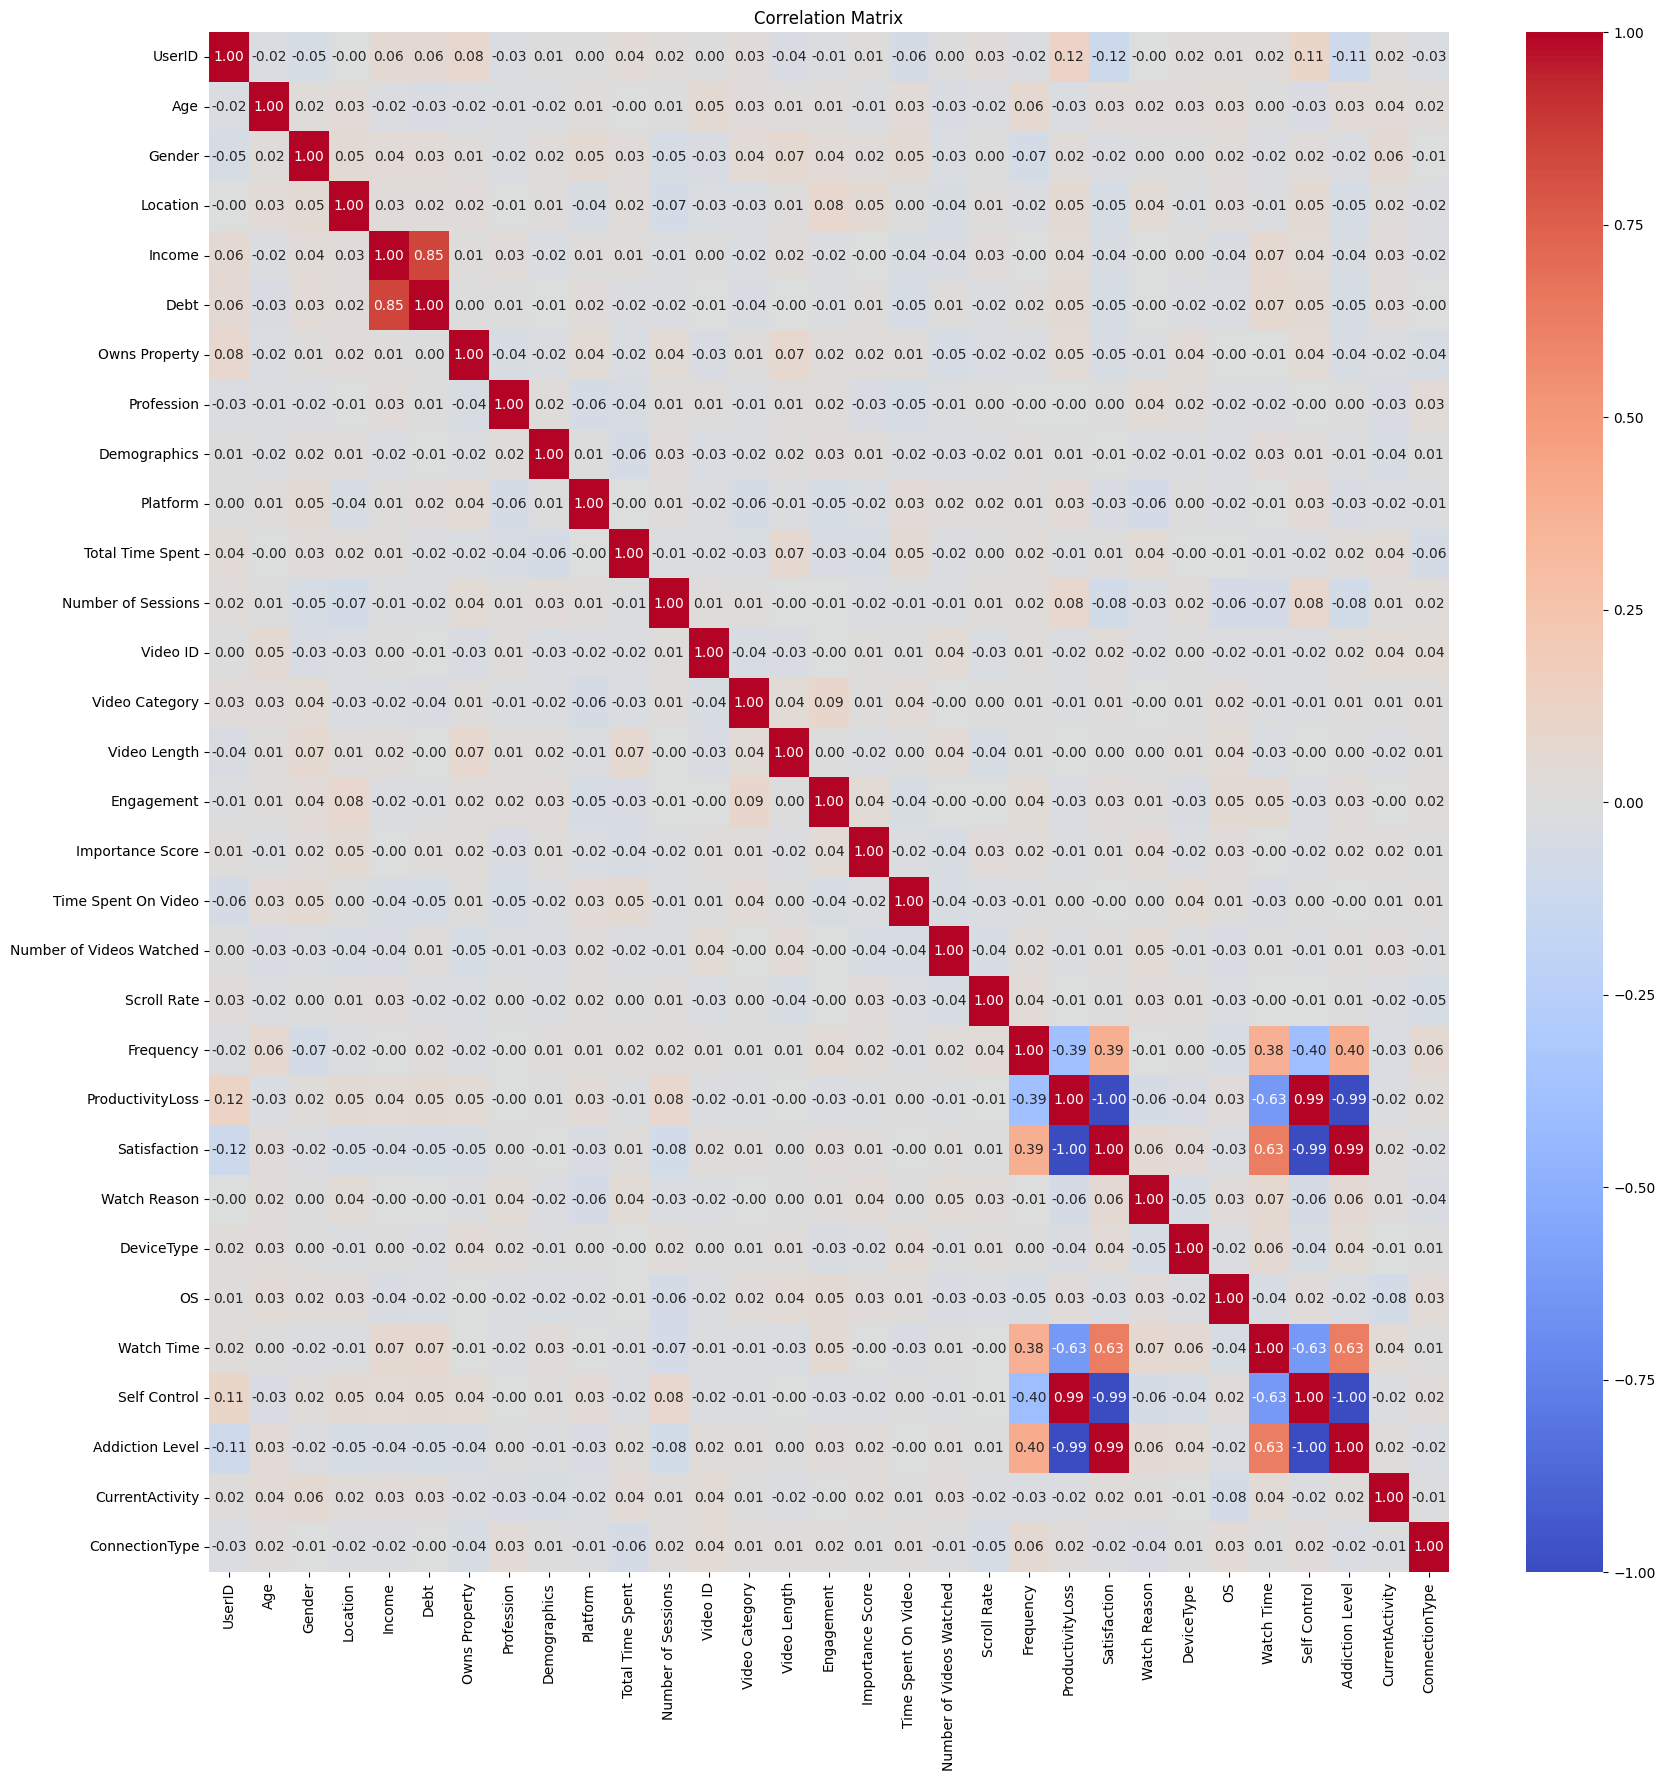

In [72]:
# prompt: corrolation matrix for all the features and the frequency variable show the matrix

# Compute the correlation matrix
correlation_matrix = media.corr()

# Display the correlation matrix (all features vs. Frequency)
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Modeling

XGBOOST

Accuracy: 0.775


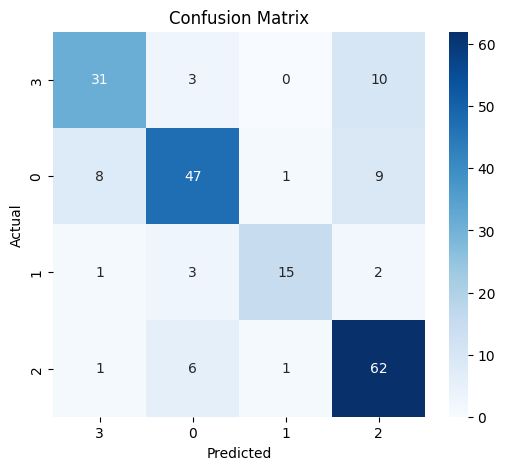

In [73]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import plot_importance

# Assuming 'media' is your DataFrame
# Selecting your features and target
X = media.drop(columns=['Frequency','Watch Time'])
y = media['Frequency']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix format, which is the internal data structure for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for multi-class classification
params = {
    'objective': 'multi:softmax',  # Multi-class classification (output hard labels)
    'eval_metric': 'mlogloss',     # Logarithmic loss (standard for multi-class classification)
    'num_class': len(y.unique()),  # Number of unique classes (4 in your case: 0, 1, 2, 3)
    'learning_rate': 0.1,
    'max_depth': 6,
    'alpha': 0.1,                  # L1 regularization to prevent overfitting
    'lambda': 1,                   # L2 regularization
    'gamma': 0.1,                  # Tree pruning
}

# Train the model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Predict using the test set
y_pred = bst.predict(dtest)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can print the confusion matrix to see the class-wise performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [97]:
print(X.columns)

Index(['Addiction Level', 'Age', 'ConnectionType'], dtype='object')


Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.97


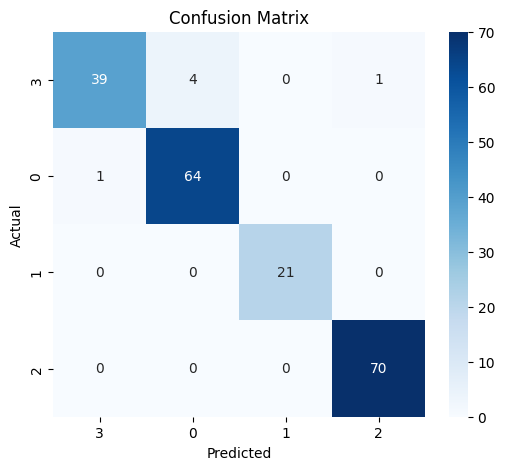

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = media.drop(columns=['Frequency'])
y = media['Frequency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



Random Forest Classifier

Accuracy: 0.775


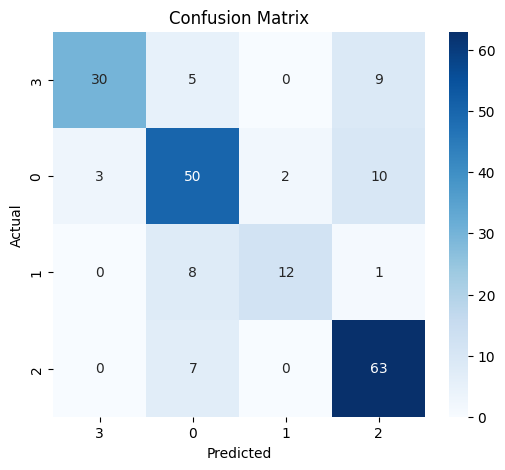

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = media.drop(columns=['Frequency','Watch Time'])
y = media['Frequency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [98]:
print(X.columns)

Index(['Addiction Level', 'Age', 'ConnectionType'], dtype='object')


SVM

Accuracy: 0.595


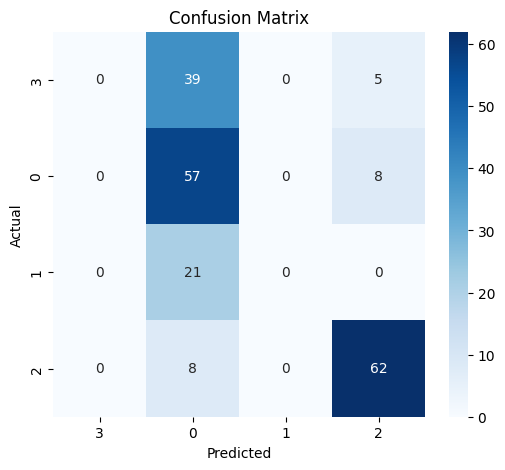

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'media' is your DataFrame
# Selecting your features and target
selected_columns = ['Addiction Level','Age','ConnectionType']
X = media[selected_columns]
y = media['Frequency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

KNN

Accuracy: 0.61


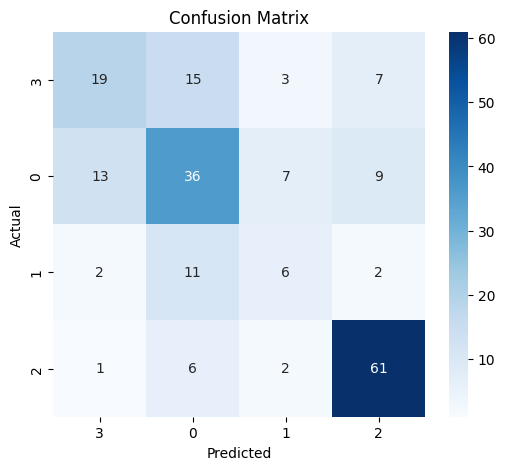

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'media' is your DataFrame
selected_columns = ['Addiction Level','Age','ConnectionType']
X = media[selected_columns]
y = media['Frequency']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors based on tuning

# Train the model
knn_model.fit(X_train, y_train)

# Predict using the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can print the confusion matrix to see the class-wise performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


DECISION TREE

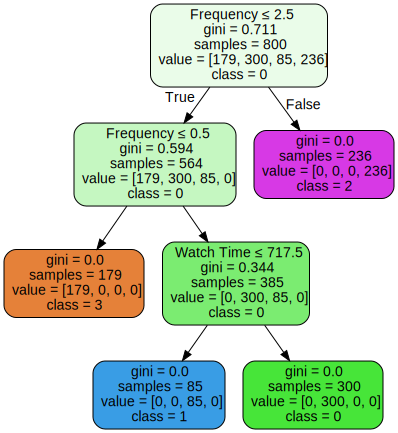

In [78]:

# Assuming 'media' is your DataFrame
# Selecting your features and target
X = media.drop(columns=['Addiction Level', 'Total Time Spent','Number of Sessions','Self Control', 'Scroll Rate', 'Satisfaction', 'ProductivityLoss'
])
y = media['Frequency']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Visualize the Decision Tree
dot_data = tree.export_graphviz(dt_model, out_file=None,
                                feature_names=X.columns,
                                class_names=[str(i) for i in y.unique()],
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph



In [79]:
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Decision Tree model: {accuracy * 100:.2f}%")



Accuracy of the Decision Tree model: 100.00%


## Model Performance Comparison

| Model          | Accuracy |
|----------------|----------|
| KNN            | 61%      |
| SVM            | 59%      |
| Random Forest  | 77%      |
| Logistic Reg   | 97%      |
| XGBoost        | 77%      |
| Decision Tree  | 100%     |


# **unsupervised** **algorithmes

# **K-means**

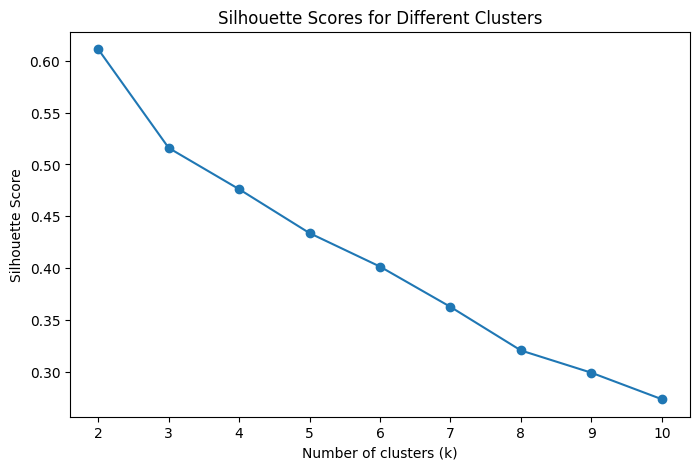

In [80]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(media)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(media, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [81]:
data = [ "Income", "Debt", "Owns Property" ,"Age"]
media_copie =media[data].copy()



In [82]:
clusterNum = 3
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(X)

KMeans(n_clusters=3)

In [83]:
labels = k_means.labels_
print(labels)

[1 0 0 2 0 0 0 0 2 0 1 0 0 1 2 2 0 0 0 2 0 0 1 0 1 2 0 0 1 2 0 1 0 2 0 1 0
 2 2 0 0 2 2 2 0 1 0 2 0 2 0 2 0 2 0 0 2 1 1 1 2 1 0 0 1 0 0 2 2 0 0 1 1 2
 2 0 0 0 2 0 0 2 0 0 1 1 0 1 0 0 2 1 2 2 1 2 1 1 2 0 0 1 1 1 1 0 1 1 1 2 1
 2 0 1 1 0 2 1 0 0 1 1 0 2 1 2 0 1 0 0 0 0 1 2 0 0 2 2 0 0 0 2 0 2 2 0 0 1
 2 0 2 1 2 0 0 1 1 2 2 2 0 1 1 0 0 0 0 2 1 2 1 0 2 1 2 0 0 1 0 1 0 0 0 1 2
 0 0 1 2 0 1 0 0 1 1 1 0 2 2 2 1 0 2 0 1 0 0 0 0 0 0 1 0 0 2 0 1 2 0 0 2 2
 2 0 0 2 2 2 0 0 0 1 1 2 0 1 0 2 1 0 2 1 2 1 2 0 1 1 0 1 2 2 1 1 1 2 0 2 1
 0 0 1 1 2 2 1 0 2 2 1 1 1 1 0 2 0 2 1 0 2 2 2 1 0 2 1 0 1 1 0 1 0 1 0 1 0
 2 1 0 0 0 0 0 1 1 2 2 0 1 2 0 0 0 1 0 1 2 2 1 2 0 0 1 1 2 1 0 2 2 1 2 2 2
 2 2 1 0 1 1 2 0 1 2 0 2 0 1 1 1 0 2 1 2 0 1 1 1 1 2 1 1 2 2 1 1 2 2 0 0 1
 1 0 2 0 2 1 2 0 1 1 2 0 0 1 1 2 0 0 2 2 2 0 0 2 0 0 0 1 2 2 2 2 0 0 0 2 0
 2 2 0 1 2 1 1 0 1 1 1 0 1 2 0 1 0 2 0 0 0 0 2 0 1 2 0 1 0 2 1 2 2 2 1 0 1
 0 0 1 2 2 1 2 1 0 2 1 1 1 1 1 0 1 1 0 2 1 1 2 2 1 0 0 1 0 2 1 2 0 0 0 2 0
 1 0 2 0 0 0 1 1 2 2 2 0 

In [84]:
# Get the cluster centers
centers = k_means.cluster_centers_
print("Cluster Centers:\n", centers)

Cluster Centers:
 [[4.75183562e+02 4.16438356e+01 8.16438356e-01 4.51780822e+00
  3.35291507e+04 3.66373598e-15 5.56164384e-01 4.64383562e+00
  2.63013699e-01 1.51506849e+00 4.86022192e+03 4.48767123e+00
  1.51287671e+01 5.04072603e+03 5.05205479e+00 1.52876712e+01
  2.50164384e+01 1.47671233e+00 1.31780822e+00 1.15890411e+00
  1.19452055e+00 9.96219178e+02 1.57260274e+00 3.34246575e-01]
 [5.17039514e+02 4.10091185e+01 8.54103343e-01 4.62310030e+00
  8.72896140e+04 1.00000000e+00 5.41033435e-01 4.74164134e+00
  2.34042553e-01 1.52887538e+00 4.97438602e+03 4.30699088e+00
  1.53009119e+01 5.01559574e+03 5.14285714e+00 1.45744681e+01
  2.41702128e+01 1.54103343e+00 1.28875380e+00 1.16109422e+00
  1.10030395e+00 1.04062310e+03 1.62310030e+00 3.10030395e-01]
 [5.12915033e+02 4.01764706e+01 8.59477124e-01 4.48692810e+00
  6.06790523e+04 8.82352941e-01 5.26143791e-01 4.67647059e+00
  2.64705882e-01 1.62091503e+00 4.84047059e+03 4.37581699e+00
  1.52222222e+01 4.92536928e+03 5.20588235e+00 1.5

In [85]:
# Get the inertia (sum of squared distances to the nearest cluster center)
inertia = k_means.inertia_
print("Inertia:", inertia)

Inertia: 78887668675.10983


In [86]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5147461093068295


In [87]:
media_copie["Niveau De Vie"] = labels
media_copie.head(5)

,Income,Debt,Owns Property,Age,Niveau De Vie
0,82812,1,1,56,1
1,27999,0,1,46,0
2,42436,0,1,32,0
3,62963,1,0,60,2
4,22096,0,1,25,0


In [88]:
media_copie["Niveau De Vie"].value_counts()

,count
Niveau De Vie,
0,365
1,329
2,306
